# **House Prediction**

<p style="color: red;">I'm no professional, this notebook is just my understading of concept.</p>

<p style="color:#0093af; font-family: Arial, sans-serif; font-weight: bold; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); text-align: center; padding: 20px;">
  I would greatly appreciate any suggestions on how to enhance the model and any tips or insights that could help improve its performance.
</p>


In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


## Importing the Data

In [14]:
test_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
train_df = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")

Id = test_df.Id

## Data Analysis

Run <code>.info()</code> and  <code>.shape</code> to see what is inside the data

In [15]:
train_df.shape

(1460, 81)

In [16]:
# train_df.drop(train_df.loc[train_df['OverallQual'] == 1].index.tolist(), axis=0, inplace=True)

## Separating the numerical Data

In [17]:
# get the num data from the train df
num_trdf = train_df.select_dtypes(['float64', 'int64'])

# choosing the columns that has more that 0.5 correlation 
corr_sp = num_trdf.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
selected_cols = corr_sp.loc[(corr_sp['SalePrice'] > 0.5) | (corr_sp['SalePrice'] < -0.5)]

# Getting the selected cols
selected_cols = selected_cols.index.tolist()

# This below isn't necessary just build earlier to see experiment with some things
num_trdf = num_trdf[selected_cols]

In [18]:
# selected_cols

### Handling Missing in the Numerical Data

In [19]:
# Checking the null in the test df

num_tedf = test_df[selected_cols[1::]]
# num_tedf.isna().sum()

#### Replacing Null values with mean

In [20]:
test_df['GarageArea'].fillna(int(train_df['GarageArea'].mean()), inplace=True)
test_df['GarageCars'].fillna(int(train_df['GarageCars'].mean()), inplace=True)
test_df['TotalBsmtSF'].fillna(train_df['TotalBsmtSF'].mean(), inplace=True)

In [21]:
# num_trdf.isna().sum()

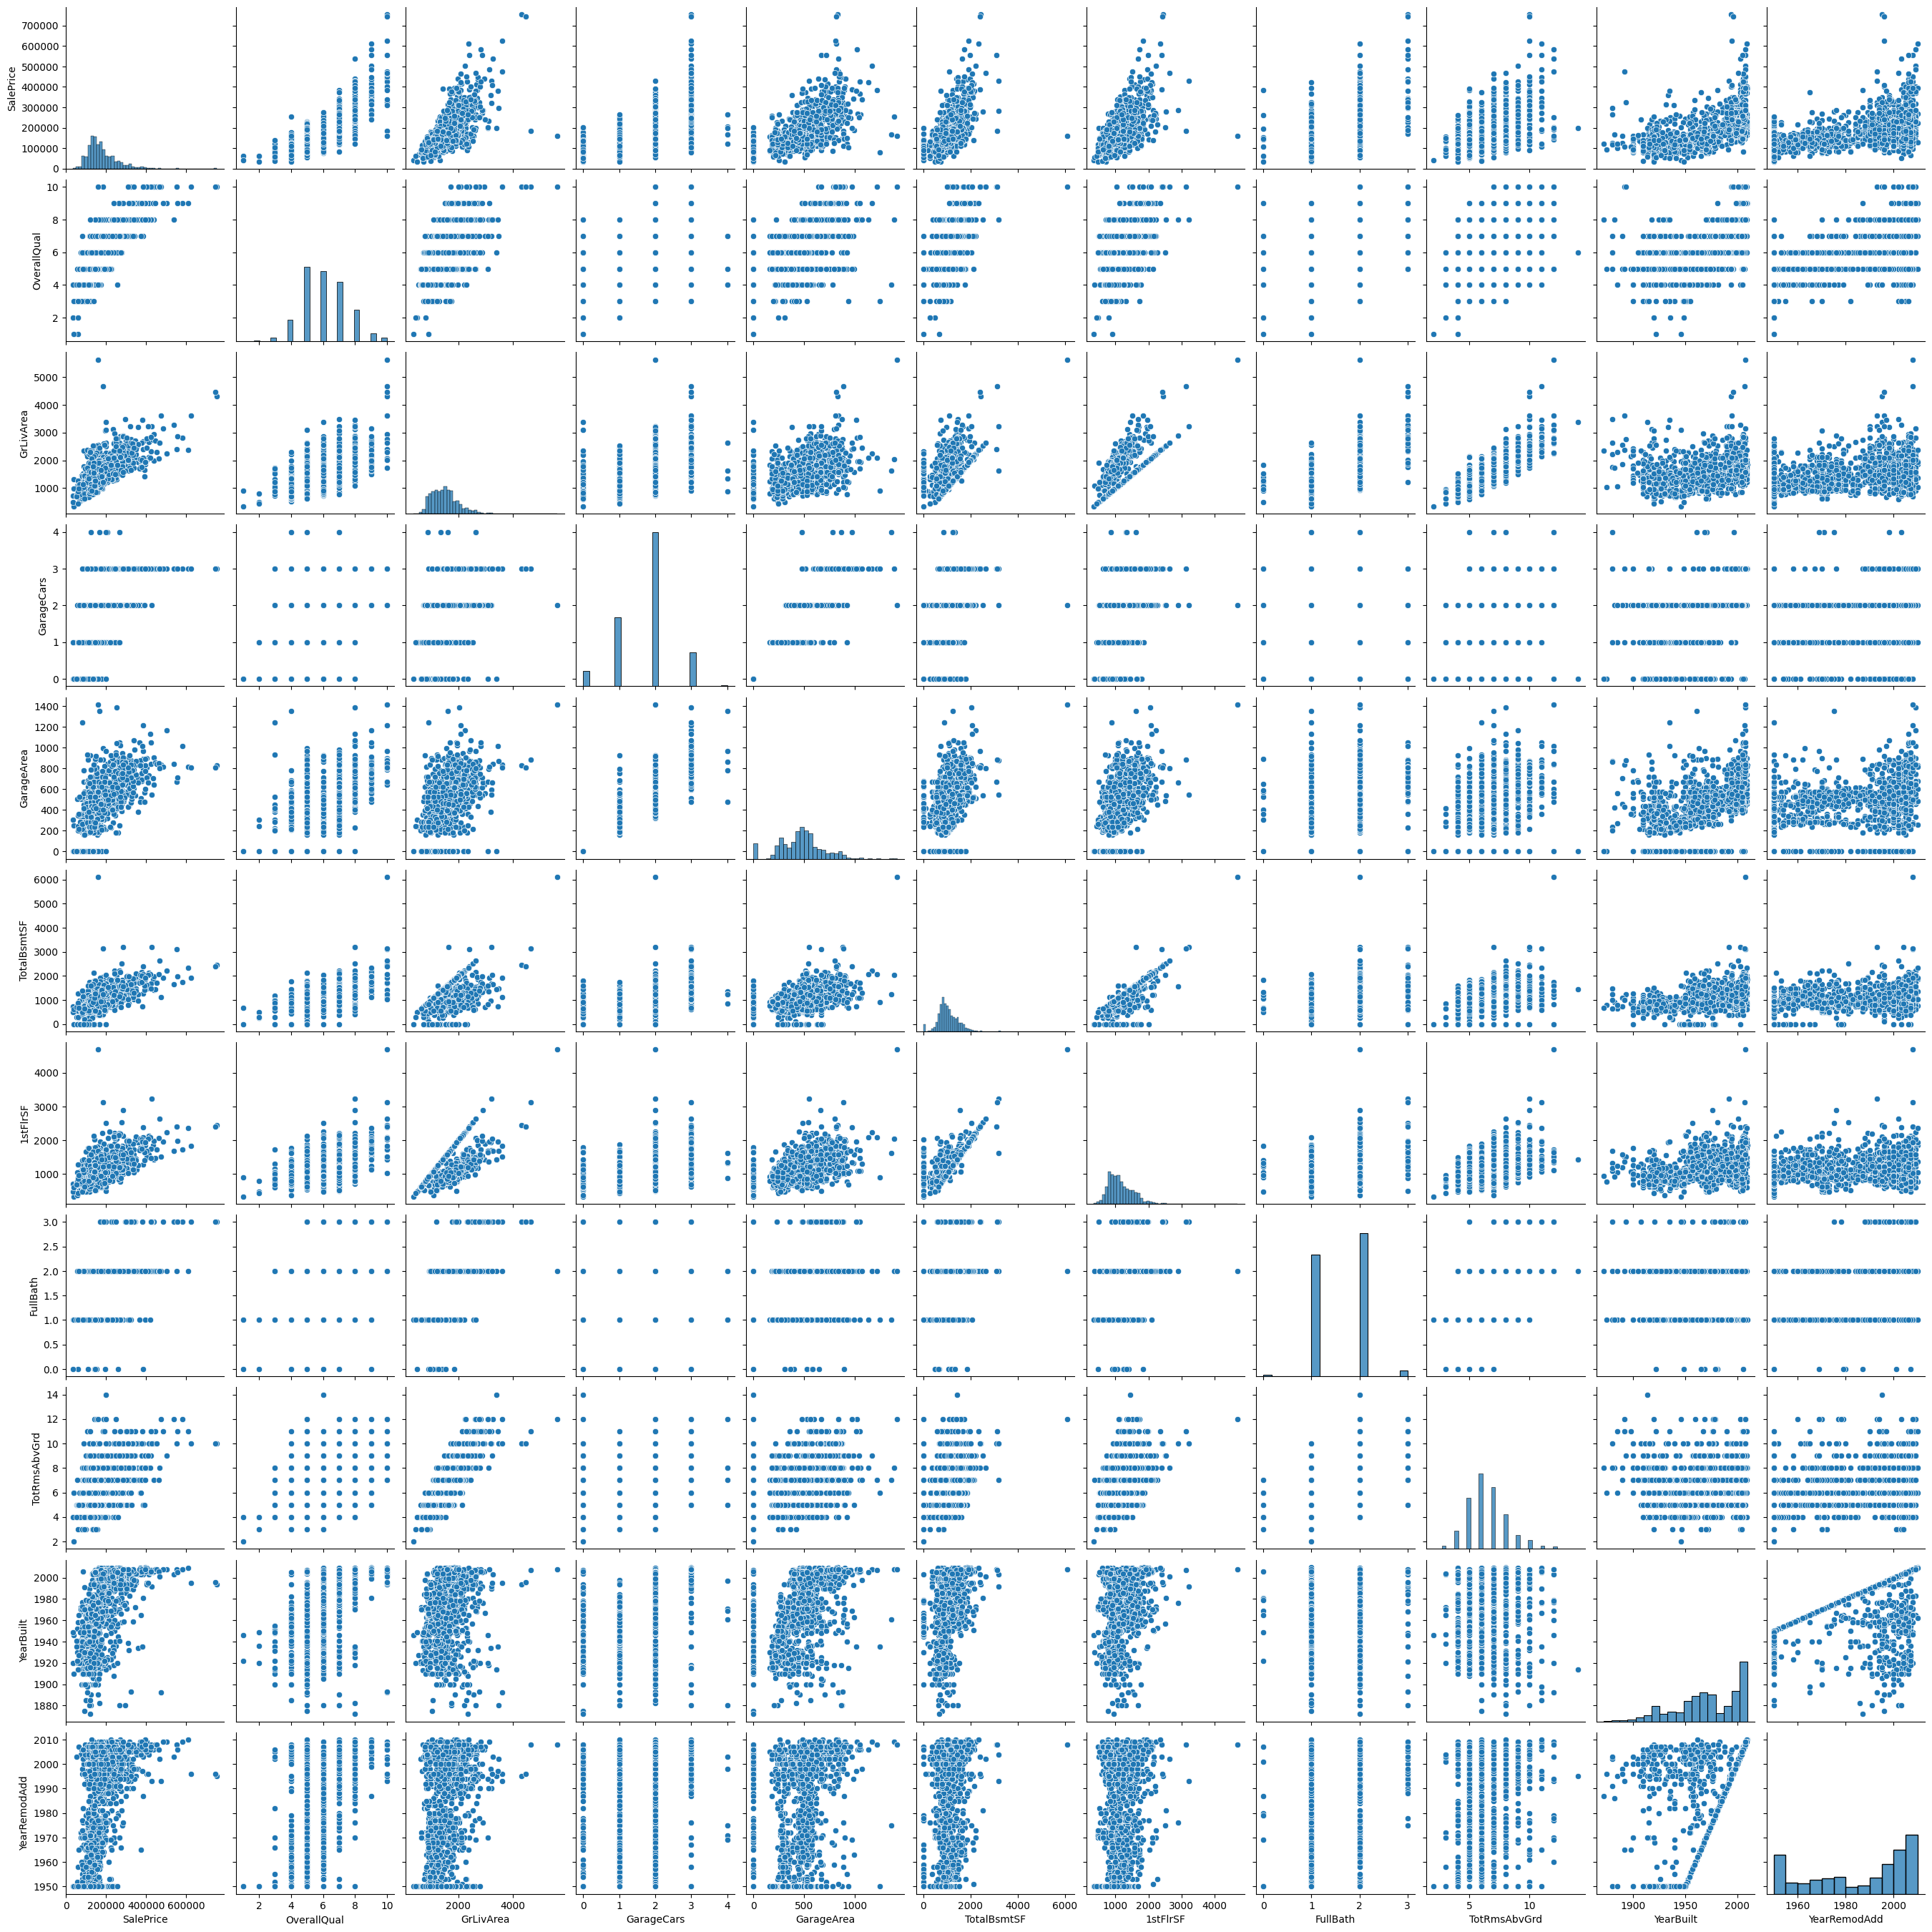

In [22]:
sns.pairplot(num_trdf)

## <p style="color: red;">**Experimentational Area**</p>
-------------------------

In [23]:
# tnum_trdf = train_df.select_dtypes(['float64', 'int64'])
# tnum_trdf.corrwith(tnum_trdf['GarageYrBlt'], axis=0).sort_values(ascending=False)

In [24]:
# tnum_trdf.corrwith(tnum_trdf['MasVnrArea'], axis=0).sort_values(ascending=False)

In [25]:
# train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mean())

In [26]:
# sns.boxplot(x=num_trdf['OverallQual'], y=num_trdf['GarageYrBlt'])

In [27]:
# pd.DataFrame(num_trdf.groupby('OverallQual')['GarageYrBlt'].mean())

In [28]:
# dic = {
#     2 : 1944,
#     3 : 1955,
#     4 : 1963,
#     5 : 1964,
#     6 : 1973,
#     7 : 1991,
#     8 : 1998,
#     9 : 2005,
#     10 : 2003
# }
# def get_garageyear(oq, gy):
#     if pd.isna(gy):
#         return dic[oq]
#     else:
#         return gy

In [29]:
# train_df.loc[pd.isna(train_df['GarageYrBlt'])]

In [30]:
# train_df['GarageYrBlt'] = train_df.apply(lambda df: get_garageyear(df['OverallQual'], df['GarageYrBlt']), axis=1)

In [31]:
# train_df['GarageYrBlt'].unique()

In [32]:
# sns.displot(train_df['GarageCars'], kde=True)

--------------------------

## Checking for Categorical Data

In [33]:
#Get all the object data type
categorical_data = train_df.select_dtypes(['object'])

# Missing object 
missing_cats = pd.DataFrame(categorical_data.isna().sum(), columns=['MissingValues'])

In [34]:
# categorical_data

In [40]:
# Filtering And Choosing only those that are zer0
categorical_data = missing_cats.loc[missing_cats['MissingValues'] == 0]
categorical_data = train_df[categorical_data.index.tolist()]

In [42]:
# Checking for the nulls in the test data
cat_tedf = test_df[categorical_data.columns]
cat = pd.DataFrame(cat_tedf.isna().sum(), columns=['Remove'])
cat = cat.loc[cat['Remove'] > 0].index

# These cat are those that should be remove from both test and train
cat

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual',
       'Functional', 'SaleType'],
      dtype='object')

In [43]:
# Getting total cols that will be used

total_col = list(set(categorical_data.columns).union(num_trdf.columns) - set(cat))
train_df = train_df[total_col]

# Remove the Sale Price col from the total col and add the other ones
test_df = test_df[[col for col in total_col if col != 'SalePrice']]

In [44]:
# print(train_df.columns)
# print(test_df.columns)

In [45]:
# I have use Label Encoding SO that there shouldn't be to many features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [46]:
# Getting all the categorical data that should be label
cat = list(set(categorical_data.columns) - set(cat))
# cat

In [47]:
# for col in cat:
#     train_df = pd.concat([train_df, pd.get_dummies(train_df[col], prefix=col, dtype='float')], axis=1)
#     train_df.drop(columns=[col], inplace=True)
#     test_df = pd.concat([test_df, pd.get_dummies(test_df[col], prefix=col, dtype='float')], axis=1)
#     test_df.drop(columns=[col], inplace=True)


for col in cat:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.fit_transform(test_df[col])

## Verifying the Data

In [48]:
missing_cols = train_df.columns[train_df.isna().sum() > 0]
print(f"Columns with missing values: {list(missing_cols)}")

Columns with missing values: []


In [49]:
missing_cols = test_df.columns[test_df.isna().sum() > 0]
print(f"Columns with missing values: {list(missing_cols)}")

Columns with missing values: []


In [51]:
print(test_df.shape)
print(train_df.shape)

(1459, 30)
(1460, 31)


## Testing and Finding Model

In [57]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [62]:
def give_insight(y_test, y_pred):
    
    print(f'Mean Square Error: {mean_squared_error(y_test, y_pred)}') 
    print(f'Root MSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')
    print(f'R2 Score: {r2_score(y_test, y_pred)}') 
    plt.scatter(y_test, y_pred)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("True Values vs Predicted Values")
    plt.show()

In [63]:
from sklearn.model_selection import  train_test_split

X = train_df.drop(['SalePrice'], axis=1)
y = train_df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=7)

In [64]:
from sklearn.linear_model import ElasticNetCV

enCV = ElasticNetCV(cv=10, n_jobs=-1, random_state=7)

param_grid = {
    'alphas': [[0.001, 0.01, 0.1, 1, 10]],
    'l1_ratio': [0.1, 0.5, 0.9],
    
}

gsCV = GridSearchCV(estimator=enCV, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)


gsCV.fit(X_train, y_train)

print(f"Best alpha: {gsCV.best_params_}")
print(f"Best RMSE: {-gsCV.best_score_}")

Best alpha: {'alphas': [0.001, 0.01, 0.1, 1, 10], 'l1_ratio': 0.1}
Best RMSE: 36366.801131593835


Mean Square Error: 1539335570.4071436
Root MSE: 39234.36721048453
R2 Score: 0.7883241385149552


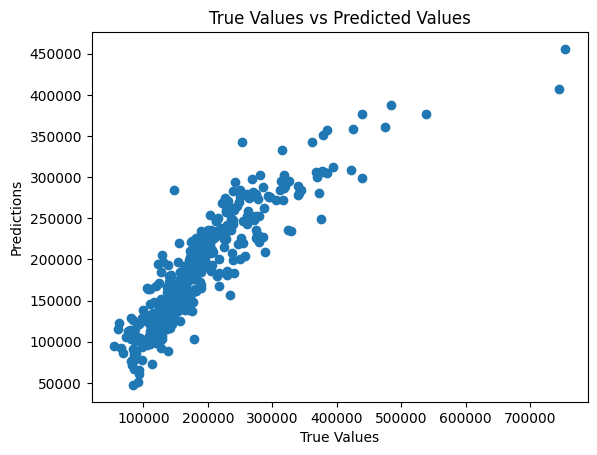

In [65]:
y_pred = gsCV.best_estimator_.predict(X_test)
give_insight(y_test, y_pred)

In [66]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=7)

param_grid_dt = {
    'max_depth': [5, 10, 15, 20, 30, None], 
    'min_samples_split': [2, 5, 10, 15, 20, 40], 
}

gsCV_dt = GridSearchCV(estimator=dtr, param_grid=param_grid_dt, scoring='neg_root_mean_squared_error', cv=10)

gsCV_dt.fit(X_train, y_train)

print(f"Best Decision Tree Depth: {gsCV_dt.best_params_}")
print(f"Best Decision Tree RMSE: {-gsCV_dt.best_score_}")

Best Decision Tree Depth: {'max_depth': 15, 'min_samples_split': 40}
Best Decision Tree RMSE: 36864.05833427622


Mean Square Error: 1810273493.9946072
Root MSE: 42547.308892509376
R2 Score: 0.7510671430378892


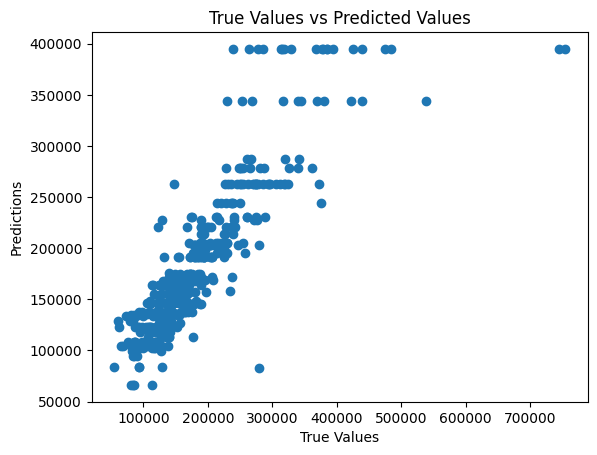

In [67]:
y_pred_dt = gsCV_dt.best_estimator_.predict(X_test)
give_insight(y_test, y_pred_dt)

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=7)

param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],  
    'max_depth': [5, 10, 15, None],  
    'min_samples_split': [2, 5, 10], 
}

gsCV_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='neg_root_mean_squared_error', cv=5)

gsCV_rf.fit(X_train, y_train)

print(f"Best Random Forest RMSE: {-gsCV_rf.best_score_}")
print(f"Best Random Forest Params: {gsCV_rf.best_params_}")

Best Random Forest RMSE: 31076.39183189914
Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


Mean Square Error: 991836464.3469404
Root MSE: 31493.435257954003
R2 Score: 0.8636113904732353


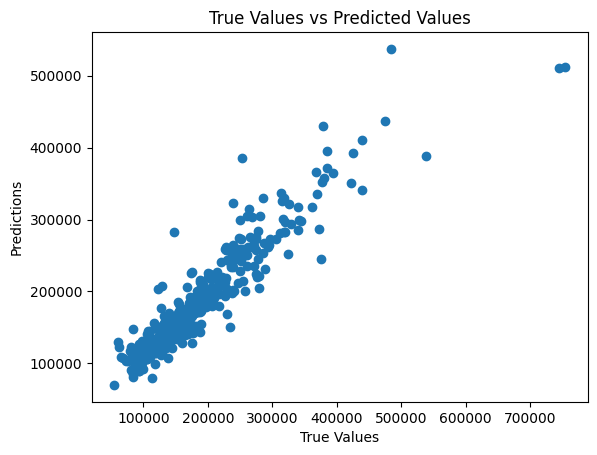

In [69]:
y_pred_rf = gsCV_rf.best_estimator_.predict(X_test)
give_insight(y_test, y_pred_rf)

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

bagging_dtc = BaggingClassifier(RandomForestClassifier(), max_samples=20, max_features=10)


bagging_dtc.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), max_features=10,
                  max_samples=20)

Mean Square Error: 4827689734.675799
Root MSE: 69481.57838359603
R2 Score: 0.33613865409494803


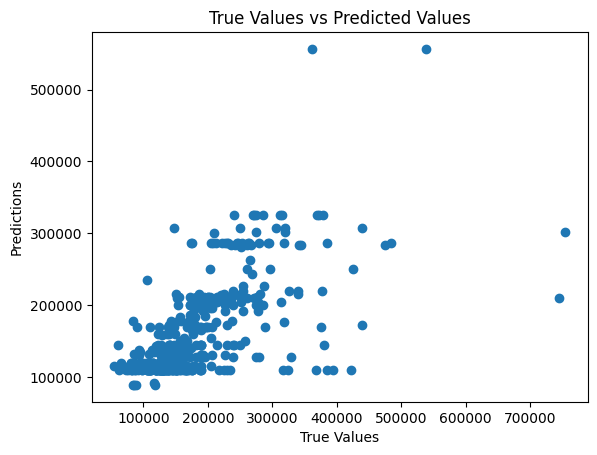

In [71]:
y_pred_bag = bagging_dtc.predict(X_test)
give_insight(y_test, y_pred_bag)

In [72]:
from sklearn.ensemble import VotingRegressor

dt_regressor = DecisionTreeRegressor(random_state=7, max_depth=10, min_samples_split=40)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=7, max_depth=None, min_samples_split=5)
en_regressor = ElasticNetCV(cv=10, n_jobs=-1, random_state=7, alphas=[0.001, 0.01, 0.1, 1, 10], l1_ratio=0.1)

vr = VotingRegressor(estimators=[
    ('dt', dt_regressor),
    ('rf', rf_regressor),
    ('en', en_regressor)
], weights=[0.3, 0.7, 0.1], n_jobs=-1)


vr.fit(X_train, y_train)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(max_depth=10,
                                                   min_samples_split=40,
                                                   random_state=7)),
                            ('rf',
                             RandomForestRegressor(min_samples_split=5,
                                                   random_state=7)),
                            ('en',
                             ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1, 10],
                                          cv=10, l1_ratio=0.1, n_jobs=-1,
                                          random_state=7))],
                n_jobs=-1, weights=[0.3, 0.7, 0.1])

Mean Square Error: 1271839769.3592618
Root MSE: 35662.86260746972
R2 Score: 0.825107803635788


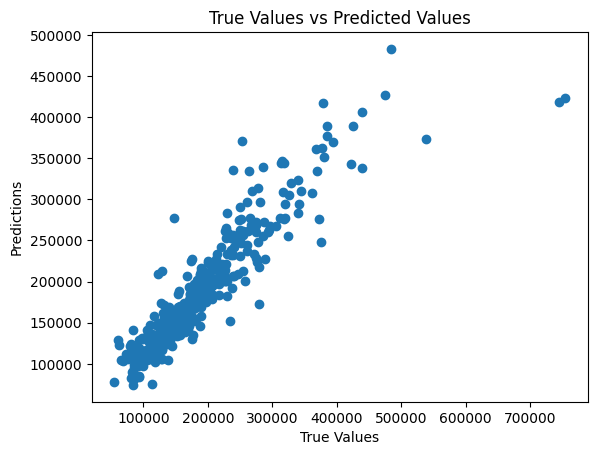

In [73]:
y_pred_vr = vr.predict(X_test)

give_insight(y_test, y_pred_vr)

In [74]:
best_params = gsCV_rf.best_params_

model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

model.fit(X, y)

test_preds = model.predict(test_df)

In [77]:
output = pd.DataFrame({'Id': Id,
                       'SalePrice': test_preds})
output.to_csv('submission.csv', index=False)

--------------------

In [76]:
# Just testing the result for voting

model_vr = vr = VotingRegressor(estimators=[
    ('dt', dt_regressor),
    ('rf', rf_regressor),
    ('en', en_regressor)
], weights=[0.3, 0.7, 0.1], n_jobs=-1)

model_vr.fit(X, y)


test_preds = model_vr.predict(test_df)